# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [25]:
def mean(xs):
    return sum(xs)/len(xs)

def var(xs):
    return sum([(x - mean(xs))**2 for x in xs])/(len(xs)-1)

def std(xs):
    return var(xs)**.5

def stats(xs):
    print("Mean: ", mean(xs))
    print("Variance: ", var(xs))
    print("Standard Deviation: ", std(xs))

In [26]:
stats([3505,2400,3027,2798,3700,3250,2689])

Mean:  3052.714285714286
Variance:  214387.90476190473
Standard Deviation:  463.0204150595357


In [27]:
import numpy as np
print("Mean: ", np.mean([3505,2400,3027,2798,3700,3250,2689]))
print("Variance: ", np.var([3505,2400,3027,2798,3700,3250,2689]))
print("Standard Deviation: ", np.std([3505,2400,3027,2798,3700,3250,2689]))

Mean:  3052.714285714286
Variance:  183761.06122448976
Standard Deviation:  428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [28]:
def covar(xs,ys):
    return sum([(x - mean(xs))*(y - mean(ys)) for x,y in zip(xs,ys)])/(len(xs)-1)

In [29]:
np.array([[var(sales),covar(sales,customers)],[covar(customers,sales),var(customers)]])

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [30]:
import pandas as pd
import numpy as np
from scipy import stats

sales = [3505,2400,3027,2798,3700,3250,2689]
customers = [127, 80, 105, 92, 120, 115, 93]
data = {"sales": sales, "customers": customers}

df = pd.DataFrame(data)
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [44]:
new = sales - np.mean(sales)
new = new/np.std(sales)
new = new.T
new

array([ 1.05508178, -1.52263698, -0.0599857 , -0.59419167,  1.50997333,
        0.46022361, -0.84846438])

In [47]:
newct = customers - np.mean(customers)
newct = newct/np.std(customers)
newct = newct.T
newct

array([ 1.42024755, -1.55593999,  0.02713849, -0.79606232,  0.97698558,
        0.66036988, -0.73273918])

In [49]:
m = np.array([[ 1.05508178, -1.52263698, -0.0599857 , -0.59419167,  1.50997333,
        0.46022361, -0.84846438],[ 1.42024755, -1.55593999,  0.02713849, -0.79606232,  0.97698558,
        0.66036988, -0.73273918]])
m = m.T
m

array([[ 1.05508178,  1.42024755],
       [-1.52263698, -1.55593999],
       [-0.0599857 ,  0.02713849],
       [-0.59419167, -0.79606232],
       [ 1.50997333,  0.97698558],
       [ 0.46022361,  0.66036988],
       [-0.84846438, -0.73273918]])

In [50]:
np.matmul(m.T,m)

array([[6.99999999, 6.73983783],
       [6.73983783, 6.99999998]])

In [35]:
matrix = np.array([[3505,2400,3027,2798,3700,3250,2689],[127, 80, 105, 92, 120, 115, 93]])
m = matrix.T
m

array([[3505,  127],
       [2400,   80],
       [3027,  105],
       [2798,   92],
       [3700,  120],
       [3250,  115],
       [2689,   93]])

In [37]:
m.T

array([[3505, 2400, 3027, 2798, 3700, 3250, 2689],
       [ 127,   80,  105,   92,  120,  115,   93]])

In [36]:
np.matmul(m.T,m)

array([[66519779,  2280213],
       [ 2280213,    78292]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [139]:
std(customers)

17.057326313123664

In [140]:
def correl(xs,ys):
    return covar(xs,ys)/((std(xs))*(std(ys)))

In [141]:
correl(sales,customers)

0.9628339778148909

In [154]:
corr_coefficient, __, = stats.pearsonr(sales, customers)
corr_coefficient

0.9628339778148909

In [162]:
import matplotlib.pyplot as plt

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sales,customers
sales,1,0.962834
customers,0.962834,1


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [193]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(df_titanic.shape)
df_titanic.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [157]:
df_titanic.describe(include=[np.number])

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [ ]:
df_number = df_titanic.select_dtypes(exclude=['object'])
df_number

In [179]:
df_number.isna().sum()

Unnamed: 0             0
pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [186]:
df_number.shape

(1310, 9)

In [203]:
df_final = df_number.drop(columns=['body','Unnamed: 0'])

In [204]:
df_final = df_final.dropna()

In [205]:
df_final.isna().sum()
print(df_final.shape)

(1308, 7)


In [206]:
df_final.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


In [207]:
corrmatrix = df_final.corr()
corrmatrix.style.background_gradient(cmap='coolwarm')

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1,-0.312122,-0.368798,0.0611623,0.0186151,-0.558629,-0.713783
survived,-0.312122,1,-0.0488873,-0.0281222,0.0824178,0.244265,0.302031
age,-0.368798,-0.0488873,1,-0.190305,-0.130355,0.171892,0.27352
sibsp,0.0611623,-0.0281222,-0.190305,1,0.373485,0.160238,-0.00926351
parch,0.0186151,0.0824178,-0.130355,0.373485,1,0.221539,0.036629
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1,0.507253
has_cabin_number,-0.713783,0.302031,0.27352,-0.00926351,0.036629,0.507253,1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

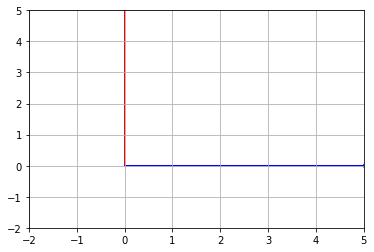

In [216]:
v1 = [0,5]
v2 = [5,0]

plt.axis([-2, 5, -2, 5])
plt.grid(True)
plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, head_length=0.1, color='r')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, head_length=0.1, color='b')
plt.show()

A synonym for orthogonal is perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [217]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

No, these vectors are not orthogonal because their dot product does not equal zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [270]:
c = np.array([2,-15,6,20])

def norm(xs):
    return sum(x**2 for x in xs)**.5

print(norm(c)**2)

665.0


In [219]:
def dot(xs,ys):
    return sum([x*y for x,y in zip(xs,ys)])

dot(c,c)

665

In [271]:
np.matmul(c.T,c)

665

The square of the norm of a vector is equal to the dot product of a vector with itself, and also to the transpose of a vector times itself.

In [239]:
def matmulti(X,Y):
      return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

In [242]:
c_new = c.reshape(1,4)
transpose = c.reshape(4, 1)
matmulti(transpose,c_new)

[[4, -30, 12, 40],
 [-30, 225, -90, -300],
 [12, -90, 36, 120],
 [40, -300, 120, 400]]

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

# Response

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [255]:
def unit(xs):
    return [x/norm(xs) for x in xs]

unit(f)

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{\sqrt(366)}\begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix} = \begin{bmatrix} \frac{4}{\sqrt(366)} & \frac{12}{\sqrt(366)} &  \frac{11}{\sqrt(366)} &  \frac{9}{\sqrt(366)} &  \frac{2}{\sqrt(366)} \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [257]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

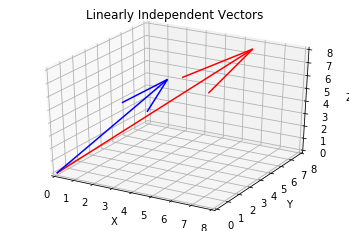

In [266]:
v1_ind = np.array([[0,0,0,4,3,7]])
v2_ind = np.array([[0,0,0,6,7,8]])

X, Y, Z, U, V, W = zip(*v1_ind)
A, B, C, D, E, F = zip(*v2_ind)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(X, Y, Z, U, V, W, length=1, color='blue')
ax.quiver(A, B, C, D, E, F, length=1, color='red')
ax.set_xlim([0,8])
ax.set_ylim([0,8])
ax.set_zlim([0,8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Linearly Independent Vectors")
plt.show()

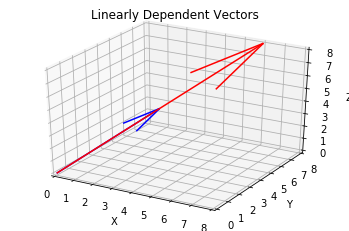

In [269]:
v1_dep = np.array([[0,0,0,3,4,4]])
v2_dep = np.array([[0,0,0,6,8,8]])

X, Y, Z, U, V, W = zip(*v1_dep)
A, B, C, D, E, F = zip(*v2_dep)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(X, Y, Z, U, V, W, length=1, color='blue')
ax.quiver(A, B, C, D, E, F, length=1, color='red')
ax.set_xlim([0,8])
ax.set_ylim([0,8])
ax.set_zlim([0,8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Linearly Dependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
gh = [[1,2],
     [4,8]]

#Add -4 times the first row to the second

gh = [[1,2],
     [0,0]]

In [317]:
gh = np.array([[1,2],[4,8]])

np.linalg.matrix_rank(gh)

1

The span is $\mathbb{R}^1$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
lmn = [[1,2,3],
      [-1,0,7]
      [4,8,2]]

#Add first row to the second

lmn = [[1,2,3],
      [0,2,10]
      [4,8,2]]

#Multiply the 2nd row by 1/2

lmn = [[1,2,3],
      [0,1,5]
      [4,8,2]]

#Add -4 times the first row to the third

lmn = [[1,2,3],
      [0,1,5]
      [0,0,-12]]

#Multiply the 3rd row by -1/12

lmn = [[1,2,3],
      [0,1,5]
      [0,0,1]]

In [319]:
lmn = np.array([[1,2,3],[-1,0,7],[4,8,2]])

np.linalg.matrix_rank(lmn)

3

The span is $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



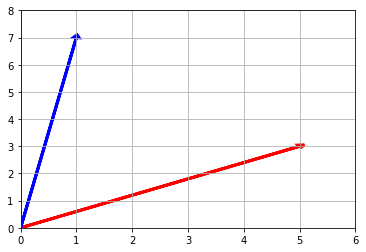

In [326]:
a = [5,3]
b = [1,7]

plt.axis([0, 6, 0, 8])
plt.grid(True)
plt.arrow(0, 0, a[0], a[1], linewidth=3, head_width=0.1, head_length=0.1, color='r')
plt.arrow(0, 0, b[0], b[1], linewidth=3, head_width=0.1, head_length=0.1, color='b')
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors can form a basis for a specific vector space if they are linearly independent and their linear combinations fill that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [327]:
lmn = np.array([[1,2,3],[-1,0,7],[4,8,2]])

np.linalg.matrix_rank(lmn)

3

## 7.2 What does the rank of a matrix tell us?

The rank tells us the dimensional space that is spanned by that matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [330]:
def proj(xs,ys):
    return (dot(xs,ys)/dot(ys,ys))*ys

v = np.array([1,3])
w = np.array([-1,2])

proj(w,v)

array([0.5, 1.5])

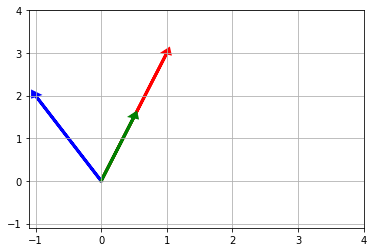

In [336]:
v1 = [1,3]
w1 = [-1,2]
p1 = [0.5,1.5]

plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)
plt.grid(True)
plt.arrow(0, 0, v1[0], v1[1], linewidth=3, head_width=0.1, head_length=0.1, color='r')
plt.arrow(0, 0, w1[0], w1[1], linewidth=3, head_width=0.1, head_length=0.1, color='b')
plt.arrow(0, 0, p1[0], p1[1], linewidth=3, head_width=0.1, head_length=0.1, color='g')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

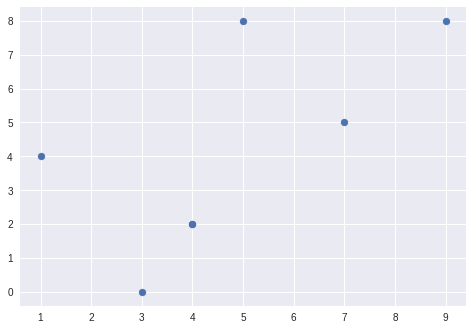

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()